# Student Performance Insights Challenge

## Challenge Description
The goal of this competition is to analyze student performance data and uncover insights that can help improve academic outcomes. Students are required to clean the data, analyze trends, visualize findings, and derive actionable insights.

### Dataset Overview
The dataset provided (`Students_Grading_Dataset.csv`) contains information about students' demographics, academic performance, extracurricular activities, family background, and other factors that may influence their grades. Key columns include:
- **Demographics**: `Gender`, `Age`, `Department`
- **Academic Performance**: `Attendance (%)`, `Midterm_Score`, `Final_Score`, `Assignments_Avg`, `Quizzes_Avg`, `Participation_Score`, `Projects_Score`, `Total_Score`, `Grade`
- **Study Habits**: `Study_Hours_per_Week`, `Extracurricular_Activities`
- **External Factors**: `Internet_Access_at_Home`, `Parent_Education_Level`, `Family_Income_Level`, `Stress_Level (1-10)`, `Sleep_Hours_per_Night`

### Problem Statement
The primary objective of this analysis is to:
1. **Understand Factors Affecting Student Performance**: Identify which variables have the strongest correlation with academic success (e.g., `Total_Score` or `Grade`).
2. **Uncover Trends and Patterns**: Explore relationships between study habits, external factors, and academic outcomes.
3. **Provide Actionable Recommendations**: Derive insights that educators, policymakers, and students can use to improve academic performance.

### Supporting Material
- Dataset: [Students Grading Dataset](https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset)
---

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option('display.max.columns',23)
pd.set_option('display.max.rows',50)

# read the data

In [38]:
df=pd.read_csv('Students_Grading_Dataset.csv')
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


# exploring the structure of the dataset.

In [39]:
print(f' the shape of the data {df.shape}')

 the shape of the data (5000, 23)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [41]:
print('simple statical analysis')
df.describe()

simple statical analysis


,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


# Handling missing values and performing basic data cleaning.

## finding the no. of null values in each column 

In [42]:
# finding the no. of null values in each column 
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

## there are three columns with missing values
1. `Attendance (%)` with 516 missing
2. `Assignments_Avg` with 517 missing
3. `Parent_Education_Level` with 1794 missing

## we try to get information about those columns

In [43]:
# finding the minimum attendace grade
df['Attendance (%)'].min()

50.01

In [44]:
# finding the minimum assignt grade
df['Assignments_Avg'].min()

50.0

In [45]:
# finding the minimum assignt grade
df['Parent_Education_Level'].unique()

array(['High School', nan, "Master's", 'PhD', "Bachelor's"], dtype=object)

## we need to find why those columns has missing
1. `Attendance (%)` Perhaps the students did not attend at the university because the lowest attendance score is `50.01`
2. `Assignments_Avg` Perhaps the students did not do any assignments because the lowest attendance score is `50`
3. `Parent_Education_Level` Perhaps the parents did not get academic education but we did not sure

## Filling in the missing values 
`Attendance (%)`, `Assignments_Avg` will fill them with `median value` while the minimum score for both of them were greater than zero
my hypothesis may be true but have no information to support my claim.
and Parent_Education_Level will fill with mode because i do not have information about the data 

In [46]:
# Filling the numeric columns with the median
cols = ['Attendance (%)', 'Assignments_Avg']

for col in cols:
    # Calculate the median of the column
    median_value = df[col].median()
    # Fill missing values with the median
    df[col].fillna(median_value, inplace=True)

C:\Users\osama\AppData\Local\Temp\ipykernel_17656\3826726769.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [47]:
# filling the Parent_Education_Level with mode 
mode_value = df['Parent_Education_Level'].mode()[0]
df['Parent_Education_Level'].fillna(value=mode_value, inplace=True)

C:\Users\osama\AppData\Local\Temp\ipykernel_17656\472650979.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parent_Education_Level'].fillna(value=mode_value, inplace=True)


# Conducting exploratory data analysis (EDA)
## visualizing  the featuers to find the patterns in data

## finding the percetages of the gender

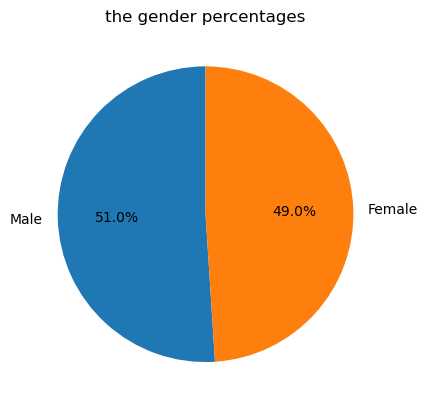

In [48]:
count_gender=df['Gender'].value_counts()
count_gender
plt.pie(count_gender,labels=count_gender.index,autopct='%1.1f%%', startangle=90)
plt.title('the gender percentages')
plt.show();

### males almost equal famalse


## finding the distribution o the age

In [49]:
df['Age'].min(),df['Age'].max()

(18, 24)

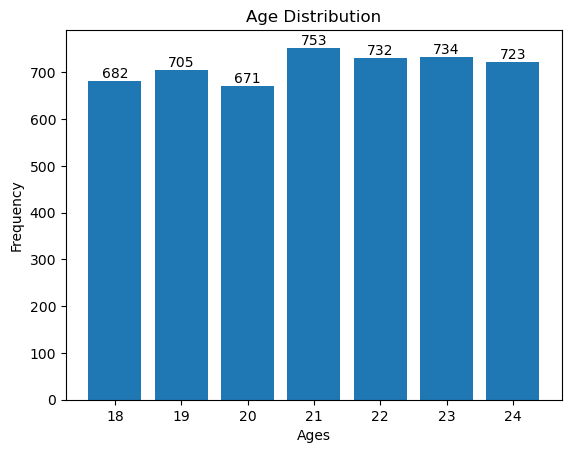

In [50]:
age_counts = df['Age'].value_counts().sort_index()  # Count occurrences of each age and sort by age

# Plotting the bar chart
bars = plt.bar(x=age_counts.index, height=age_counts.values)


for bar in bars:
    height = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 0.5,                     
             f'{int(height)}',                 
             ha='center',                      
             va='bottom')                      

plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')

plt.show()

## the age distribution is also almost equal to the following uniform distribution

## finding the department percentages

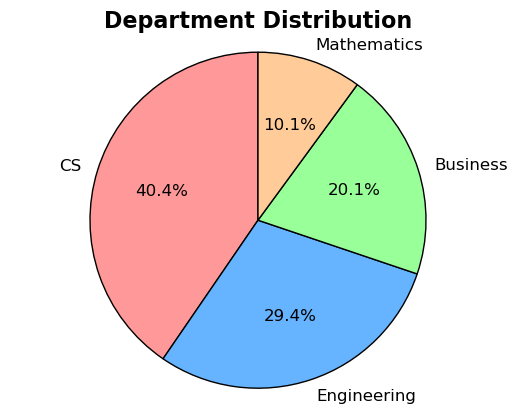

In [51]:
count_dep = df['Department'].value_counts()


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']


plt.pie(
    count_dep, 
    labels=count_dep.index, 
    autopct='%1.1f%%',      
    startangle=90,          
    colors=colors,          
    wedgeprops={'edgecolor': 'black'},  
    textprops={'fontsize': 12}          
)


plt.title('Department Distribution', fontsize=16, fontweight='bold')

plt.axis('equal')


plt.show()

### 69.4% of the university is studying computer science and studying engineering the most of of sutdents

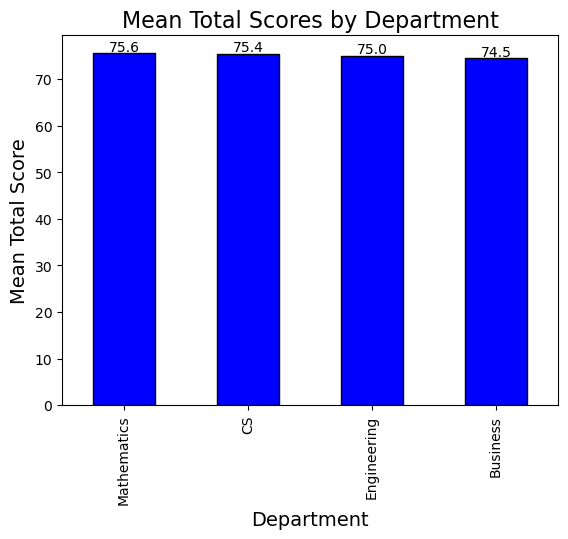

In [52]:
# Step 1: Group by 'Department' and calculate the mean of 'Total_Score'
mean_scores_by_department = df.groupby('Department')['Total_Score'].mean()

# Step 2: Sort the departments by mean score (optional, for better visualization)
mean_scores_by_department = mean_scores_by_department.sort_values(ascending=False)

# Step 3: Visualize the results using a bar chart

bars = mean_scores_by_department.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Mean Total Scores by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
# Step 4: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_department):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')
plt.show()

### no department grades better than any one

## finding the distribution of the Attendance feature

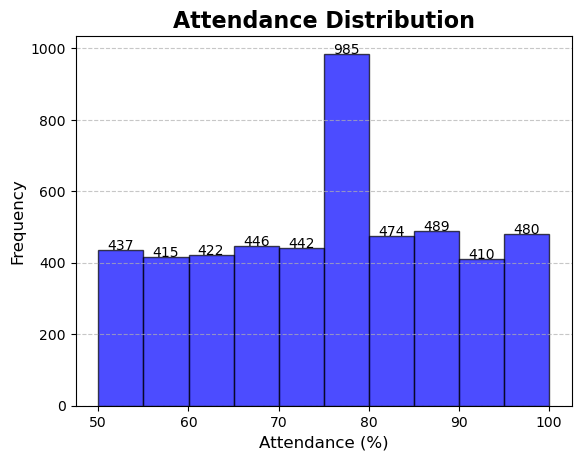

In [53]:
counts, bins, patches = plt.hist(
    df['Attendance (%)'],  
    bins=10,               
    color='blue',       
    edgecolor='black',     
    alpha=0.7              
)


for count, patch in zip(counts, patches):
    x = patch.get_x() + patch.get_width() / 2 
    y = count + 0.5                           
    plt.text(x, y, f'{int(count)}', ha='center', fontsize=10) 
# Adding titles and label
plt.title('Attendance Distribution', fontsize=16, fontweight='bold') 
plt.xlabel('Attendance (%)', fontsize=12)                           
plt.ylabel('Frequency', fontsize=12)                                


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### detection is the outlayers or not

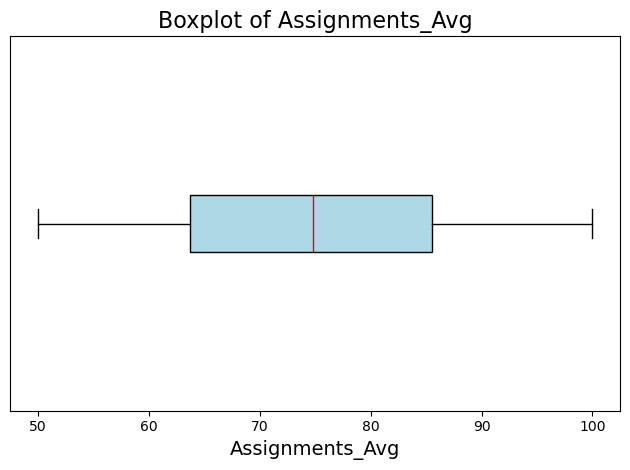

In [54]:
# Create a boxplot for the 'Assignments_Avg' column
plt.boxplot(df['Assignments_Avg'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))

# Add labels and title
plt.title('Boxplot of Assignments_Avg', fontsize=16)
plt.xlabel('Assignments_Avg', fontsize=14)
plt.show()

### there is no outlayers

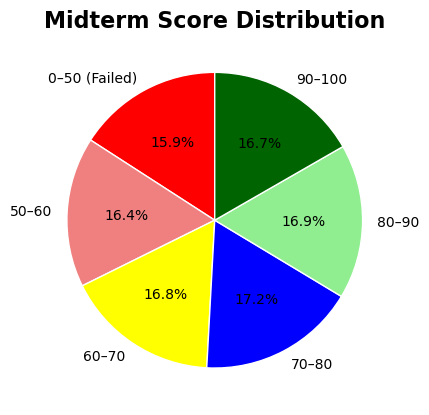

In [55]:
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0–50 (Failed)', '50–60', '60–70', '70–80', '80–90', '90–100']

# Categorize the Midterm_Score into the defined ranges
df['Grade_Range'] = pd.cut(df['Midterm_Score'], bins=bins, labels=labels)

# Count the frequencies of each grade range
grade_counts = df['Grade_Range'].value_counts().sort_index()
colors = ['red', 'lightcoral', 'yellow', 'blue', 'lightgreen', 'darkgreen']
plt.pie(
    grade_counts,              
    labels=grade_counts.index, 
    autopct='%1.1f%%',         
    startangle=90,             
    colors=colors, 
    wedgeprops={'edgecolor': 'white'} 
)


plt.title('Midterm Score Distribution', fontsize=16, fontweight='bold')


plt.show()

### There are `795` students who failed and `835` got `A+` in the midterm exam that means the exam was moderate

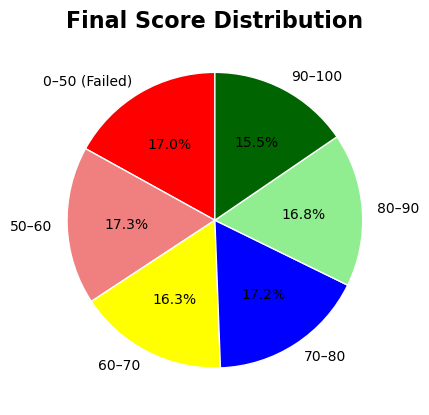

In [58]:
# Define the bins and labels for the score ranges
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0–50 (Failed)', '50–60', '60–70', '70–80', '80–90', '90–100']

# Categorize the Final_Score into the defined ranges
df['final_Range'] = pd.cut(df['Final_Score'], bins=bins, labels=labels)

# Count the frequencies of each grade range
grade_counts = df['final_Range'].value_counts().sort_index()
colors = ['red', 'lightcoral', 'yellow','blue', 'lightgreen', 'darkgreen']
plt.pie(
    grade_counts,               
    labels=grade_counts.index,  
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors, 
    wedgeprops={'edgecolor': 'white'}  
)

plt.title('Final Score Distribution', fontsize=16, fontweight='bold')


plt.show()

### there are `850` student failed and `865` got from `50:60` that mens the final exam was diffecult

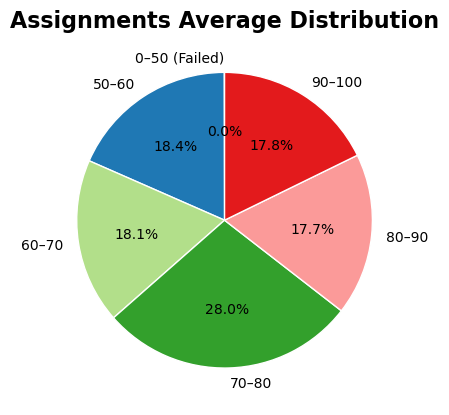

In [76]:
# Define the bins and labels for the score ranges
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0–50 (Failed)', '50–60', '60–70', '70–80', '80–90', '90–100']

# Categorize the Assignments_Avg into the defined ranges
df['Grade_Range'] = pd.cut(df['Assignments_Avg'], bins=bins, labels=labels)

# Count the frequencies of each grade range
grade_counts = df['Grade_Range'].value_counts().sort_index()
colors = ['red', 'lightcoral', 'yellow','blue', 'lightgreen', 'darkgreen']
plt.pie(
    grade_counts,                
    labels=grade_counts.index,   
    autopct='%1.1f%%',           
    startangle=90,               
    colors=plt.cm.Paired.colors, 
    wedgeprops={'edgecolor': 'white'} 
)


plt.title('Assignments Average Distribution', fontsize=16, fontweight='bold')


plt.show()

### there are no failers and from the percentages that shows the assignments were easy

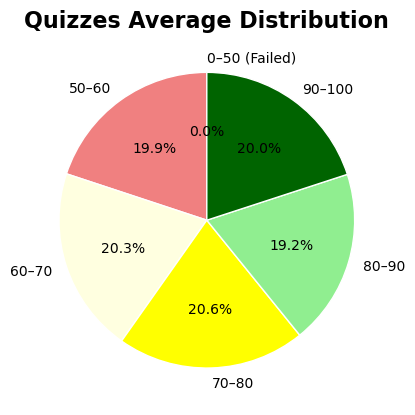

In [62]:
# Define the bins and labels for the score ranges
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0–50 (Failed)', '50–60', '60–70', '70–80', '80–90', '90–100']

# Categorize the Quizzes_Avg into the defined ranges
df['Grade_Range'] = pd.cut(df['Quizzes_Avg'], bins=bins, labels=labels)

# Count the frequencies of each grade range
grade_counts = df['Grade_Range'].value_counts().sort_index()

# Define custom colors for each grade range
colors = ['red', 'lightcoral', 'lightyellow', 'yellow', 'lightgreen', 'darkgreen']
# Plot the pie chart

plt.pie(
    grade_counts,               
    labels=grade_counts.index,  
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    wedgeprops={'edgecolor': 'white'}  
)

plt.title('Quizzes Average Distribution', fontsize=16, fontweight='bold')

plt.show()

### no failers and `999` students got from `50:60` and `1000` got `A+` the quizes were moderat

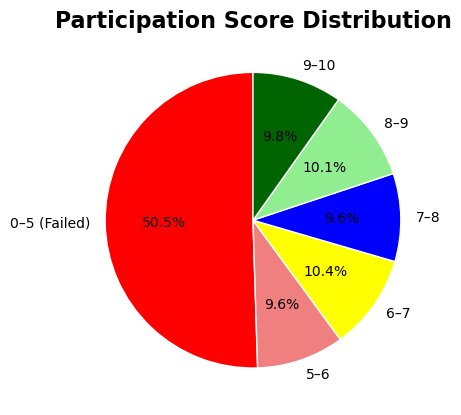

In [102]:
# Define the bins and labels for the score ranges
bins = [0, 5, 6, 7, 8, 9, 10]
labels = ['0–5 (Failed)', '5–6', '6–7', '7–8', '8–9', '9–10']

# Categorize the Participation_Score into the defined ranges
df['Grade_Range'] = pd.cut(df['Participation_Score'], bins=bins, labels=labels)

# Count the frequencies of each grade range
grade_counts = df['Grade_Range'].value_counts().sort_index()

# Define custom colors for each grade range
colors = ['red', 'lightcoral', 'yellow', 'blue', 'lightgreen', 'darkgreen']
plt.pie(
    grade_counts,               
    labels=grade_counts.index,  
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    wedgeprops={'edgecolor': 'white'}  
)

plt.title('Participation Score Distribution', fontsize=16, fontweight='bold')

plt.show()

### `2750` student got less than the half degrees on the participation that would mean the lectures board and not interactive

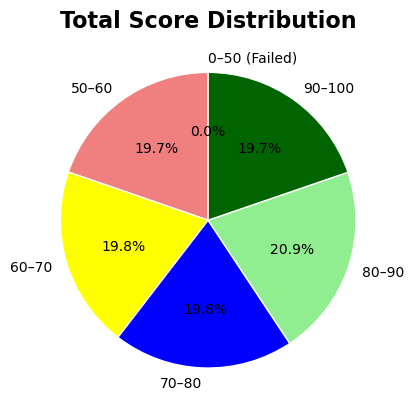

In [67]:

# Define the bins and labels for the score ranges
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0–50 (Failed)', '50–60', '60–70', '70–80', '80–90', '90–100']

# Categorize the Total_Score into the defined ranges
df['Grade_Range'] = pd.cut(df['Total_Score'], bins=bins, labels=labels)

# Count the frequencies of each grade range
grade_counts = df['Grade_Range'].value_counts().sort_index()

# Define custom colors for each grade range
colors = ['red', 'lightcoral', 'yellow', 'blue', 'lightgreen', 'darkgreen']

# Plot the pie chart
plt.pie(
    grade_counts,               
    labels=grade_counts.index,  
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    wedgeprops={'edgecolor': 'white'} )


plt.title('Total Score Distribution', fontsize=16, fontweight='bold')


plt.show()

### no failers `3020` students got grades from `70:100` the overall is good grades

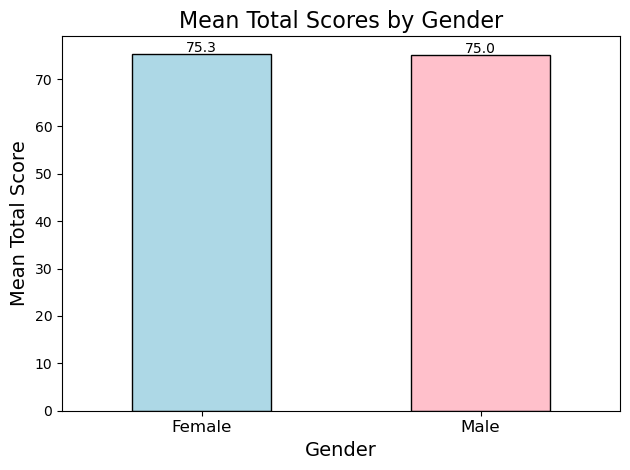

In [70]:

# Step 1: Calculate the mean Total_Score for each gender
mean_scores_by_gender = df.groupby('Gender')['Total_Score'].mean()

# Step 2: Create a bar chart
mean_scores_by_gender.plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')

# Step 3: Add labels and title
plt.title('Mean Total Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
p

# Step 4: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_gender):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')


plt.show()

C:\Users\osama\AppData\Local\Temp\ipykernel_17656\2482040515.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores_by_study_hours = df.groupby('Study_Hours_Bins')['Total_Score'].mean()


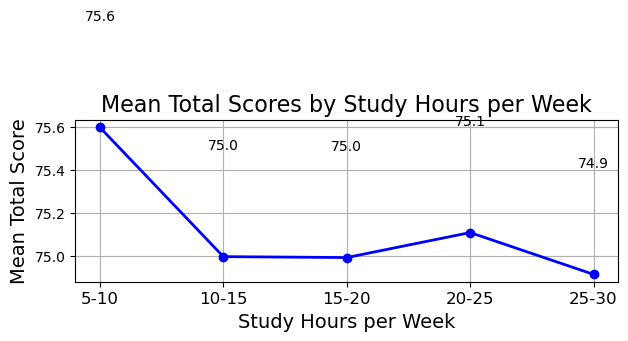

In [78]:
# Step 1: Define the bins and labels for Study_Hours_per_Week
bins = [5, 10, 15, 20, 25, 30]
labels = ['5-10', '10-15', '15-20', '20-25', '25-30']

# Step 2: Create a new column to categorize Study_Hours_per_Week into bins
df['Study_Hours_Bins'] = pd.cut(df['Study_Hours_per_Week'], bins=bins, labels=labels, right=False)

# Step 3: Calculate the mean Total_Score for each bin
mean_scores_by_study_hours = df.groupby('Study_Hours_Bins')['Total_Score'].mean()

# Step 4: Sort the bins by their range (optional, since pd.cut already sorts them)
mean_scores_by_study_hours = mean_scores_by_study_hours.sort_index()

# Step 5: Create a line chart
plt.plot(mean_scores_by_study_hours.index, mean_scores_by_study_hours.values, marker='o', color='blue', linestyle='-', linewidth=2)

# Step 6: Add labels and title
plt.title('Mean Total Scores by Study Hours per Week', fontsize=16)
plt.xlabel('Study Hours per Week', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(True)  # Add gridlines for better readability

# Step 7: Annotate the points with their mean values
for i, value in enumerate(mean_scores_by_study_hours):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')

plt.show()

### there is no relation between Study_Hours_per_Week and the grades `data says that`

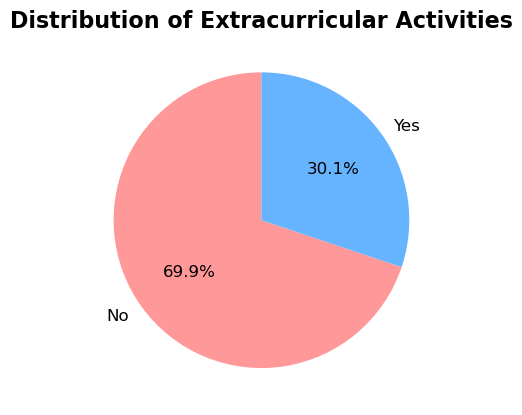

In [103]:
# Step 1: Count the occurrences of each category in 'Extracurricular_Activities'
count_dep = df['Extracurricular_Activities'].value_counts()

# Step 2: Define custom colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Add more colors if needed

# Step 3: Create the pie chart
plt.pie(
    count_dep, 
    labels=count_dep.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    colors=colors,            
    textprops={'fontsize': 12}
)

# Step 4: Add a title
plt.title('Distribution of Extracurricular Activities', fontsize=16, fontweight='bold')
plt.show()

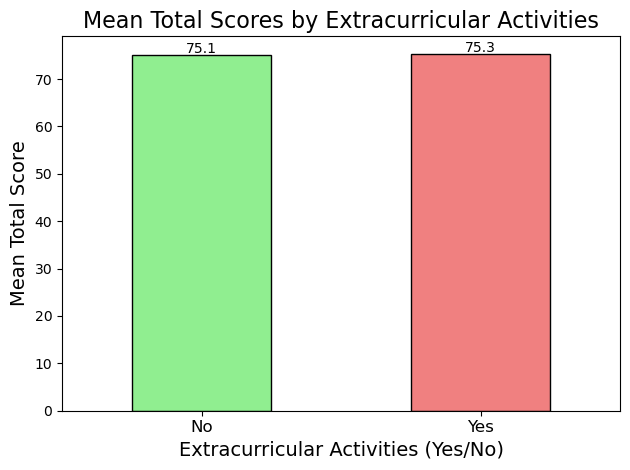

In [80]:


# Step 1: Group by 'Extracurricular_Activities' and calculate the mean Total_Score
mean_scores_by_activity = df.groupby('Extracurricular_Activities')['Total_Score'].mean()

# Step 2: Sort the groups (optional, if needed)
mean_scores_by_activity = mean_scores_by_activity.sort_index()

# Step 3: Create a bar chart
mean_scores_by_activity.plot(kind='bar', color=['lightgreen', 'lightcoral'], edgecolor='black')

# Step 4: Add labels and title
plt.title('Mean Total Scores by Extracurricular Activities', fontsize=16)
plt.xlabel('Extracurricular Activities (Yes/No)', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # No rotation for x-axis labels

# Step 5: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_activity):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')

plt.show()

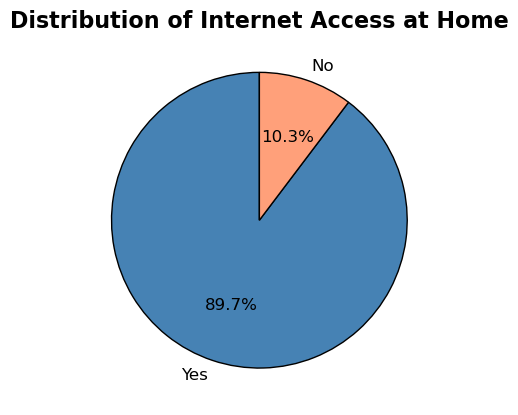

In [104]:

# Step 1: Count the occurrences of each category in 'Internet_Access_at_Home'
count_dep = df['Internet_Access_at_Home'].value_counts()

# Step 2: Define custom colors for the pie chart
colors = ['#4682B4', '#FFA07A']  # Example: SteelBlue for 'Yes', LightSalmon for 'No'

# Step 3: Create the pie chart
plt.pie(
    count_dep, 
    labels=count_dep.index,
    autopct='%1.1f%%',      
    startangle=90,          
    colors=colors,          
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

# Step 4: Add a title
plt.title('Distribution of Internet Access at Home', fontsize=16, fontweight='bold')


plt.show()

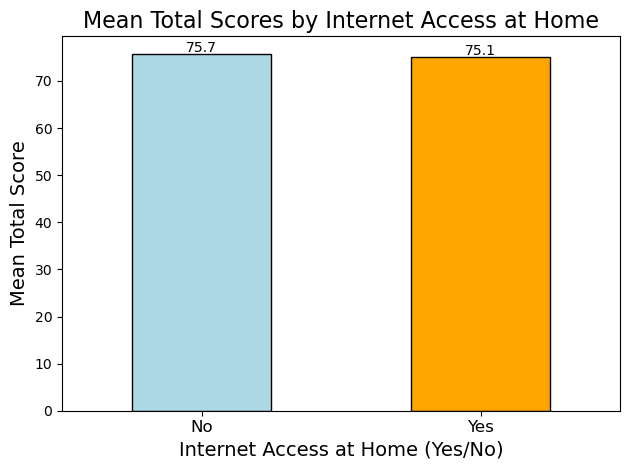

In [82]:
# Step 1: Group by 'Internet_Access_at_Home' and calculate the mean Total_Score
mean_scores_by_internet = df.groupby('Internet_Access_at_Home')['Total_Score'].mean()

# Step 2: Sort the groups (optional, if needed)
mean_scores_by_internet = mean_scores_by_internet.sort_index()

# Step 3: Create a bar chart
mean_scores_by_internet.plot(kind='bar', color=['lightblue', 'orange'], edgecolor='black')

# Step 4: Add labels and title
plt.title('Mean Total Scores by Internet Access at Home', fontsize=16)
plt.xlabel('Internet Access at Home (Yes/No)', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # No rotation for x-axis labels

# Step 5: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_internet):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')

plt.show()

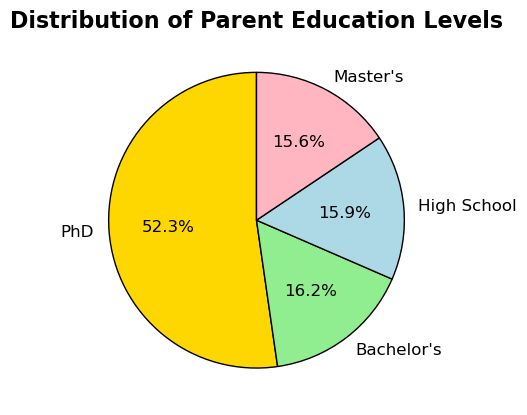

In [85]:


# Step 1: Count the occurrences of each category in 'Parent_Education_Level'
count_parent_education = df['Parent_Education_Level'].value_counts()

# Step 2: Define custom colors for the pie chart
colors = ['#FFD700', '#90EE90', '#ADD8E6', '#FFB6C1', '#FFA500', '#87CEEB']  # Add more colors if needed

# Step 3: Create the pie chart
plt.pie(
    count_parent_education, 
    labels=count_parent_education.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    colors=colors,            
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'} 
)

# Step 4: Add a title
plt.title('Distribution of Parent Education Levels', fontsize=16, fontweight='bold')


plt.show()

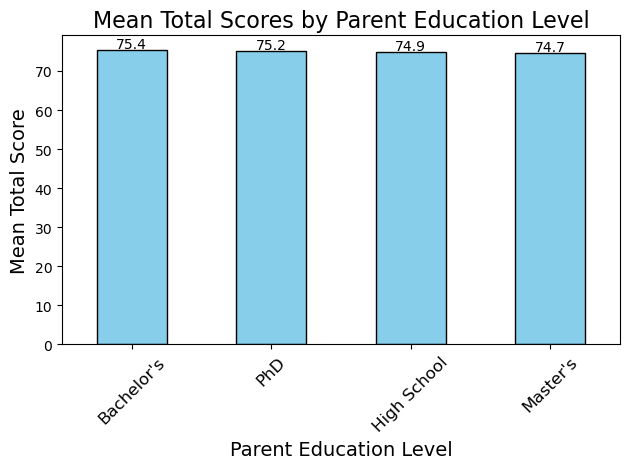

In [86]:
# Step 1: Group by 'Parent_Education_Level' and calculate the mean Total_Score
mean_scores_by_parent_education = df.groupby('Parent_Education_Level')['Total_Score'].mean()

# Step 2: Sort the groups by mean score (optional, for better visualization)
mean_scores_by_parent_education = mean_scores_by_parent_education.sort_values(ascending=False)

# Step 3: Create a bar chart
mean_scores_by_parent_education.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 4: Add labels and title
plt.title('Mean Total Scores by Parent Education Level', fontsize=16)
plt.xlabel('Parent Education Level', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for readability

# Step 5: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_parent_education):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

## the most of student's parents have PhD but that does not affect on thier grades

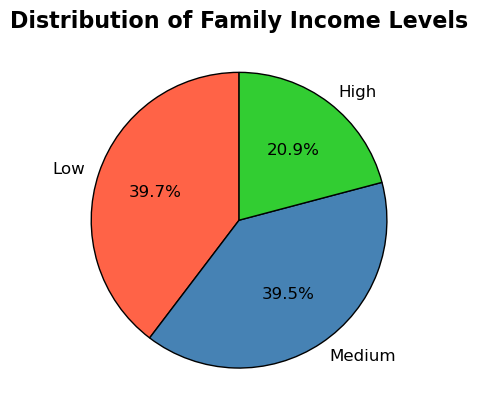

In [88]:
# Step 1: Count the occurrences of each category in 'Family_Income_Level'
count_income_levels = df['Family_Income_Level'].value_counts()

# Step 2: Define custom colors for the pie chart
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB']  # Add more colors if needed

# Step 3: Create the pie chart
plt.pie(
    count_income_levels, 
    labels=count_income_levels.index, 
    autopct='%1.1f%%',      
    startangle=90,          
    colors=colors,          
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}  
)

# Step 4: Add a title
plt.title('Distribution of Family Income Levels', fontsize=16, fontweight='bold')


plt.show()

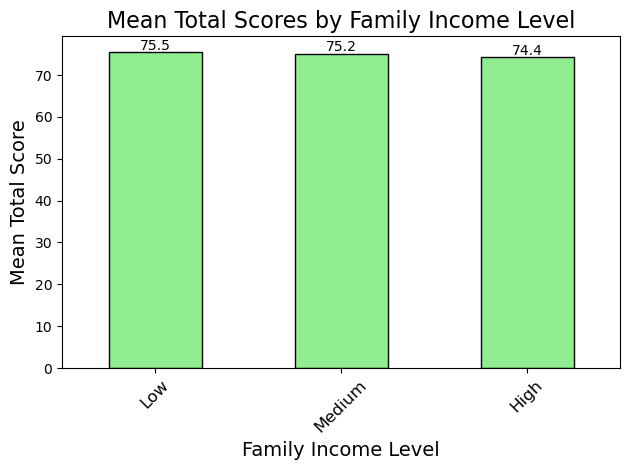

In [89]:

# Step 1: Group by 'Family_Income_Level' and calculate the mean Total_Score
mean_scores_by_income = df.groupby('Family_Income_Level')['Total_Score'].mean()

# Step 2: Sort the groups by mean score (optional, for better visualization)
mean_scores_by_income = mean_scores_by_income.sort_values(ascending=False)

# Step 3: Create a bar chart
mean_scores_by_income.plot(kind='bar', color='lightgreen', edgecolor='black')

# Step 4: Add labels and title
plt.title('Mean Total Scores by Family Income Level', fontsize=16)
plt.xlabel('Family Income Level', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for readability

# Step 5: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_income):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')

plt.show()

### the family income does not affect on the student's grades

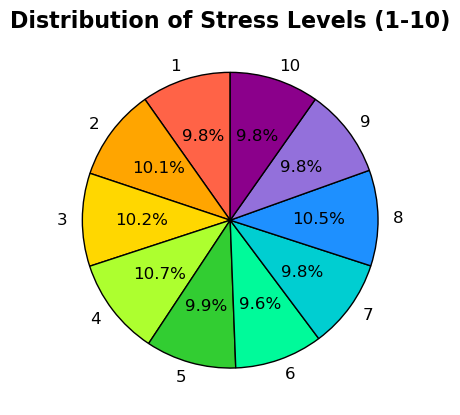

In [105]:
# Step 1: Count the occurrences of each stress level
stress_counts = df['Stress_Level (1-10)'].value_counts().sort_index()  # Sort by stress level (1 to 10)

# Step 2: Define custom colors for the pie chart
colors = ['#FF6347', '#FFA500', '#FFD700', '#ADFF2F', '#32CD32', 
          '#00FA9A', '#00CED1', '#1E90FF', '#9370DB', '#8B008B']  # Colors for levels 1 to 10

# Step 3: Create the pie chart
plt.pie(
    stress_counts, 
    labels=stress_counts.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    colors=colors,            
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}  
)

# Step 4: Add a title
plt.title('Distribution of Stress Levels (1-10)', fontsize=16, fontweight='bold')


plt.show()

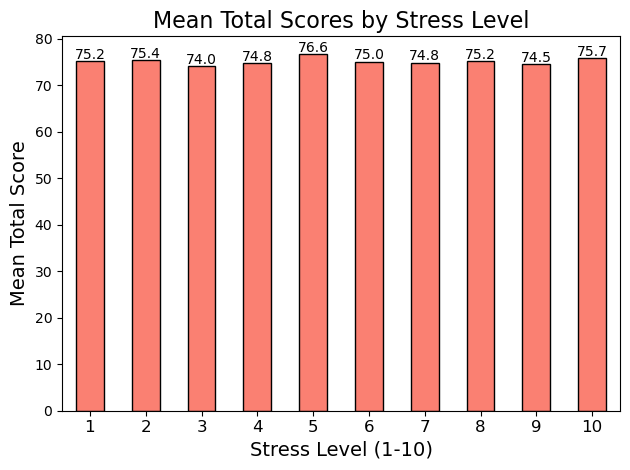

In [93]:

# Step 1: Group by 'Stress_Level (1-10)' and calculate the mean Total_Score
mean_scores_by_stress = df.groupby('Stress_Level (1-10)')['Total_Score'].mean()

# Step 2: Sort the groups by stress level (optional, for better visualization)
mean_scores_by_stress = mean_scores_by_stress.sort_index()

# Step 3: Create a bar chart
mean_scores_by_stress.plot(kind='bar', color='salmon', edgecolor='black')

# Step 4: Add labels and title
plt.title('Mean Total Scores by Stress Level', fontsize=16)
plt.xlabel('Stress Level (1-10)', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # No rotation for x-axis labels

# Step 5: Annotate the bars with their mean values
for i, value in enumerate(mean_scores_by_stress):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

### the stress does not affect on the grades

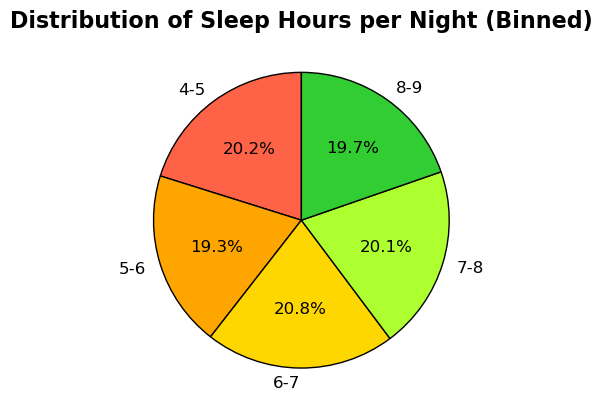

In [99]:

# Step 1: Define the bins and labels for Sleep_Hours_per_Night
bins = [4, 5, 6, 7, 8, 9]
labels = ['4-5', '5-6', '6-7', '7-8', '8-9']

# Step 2: Categorize Sleep_Hours_per_Night into bins
df['Sleep_Bins'] = pd.cut(df['Sleep_Hours_per_Night'], bins=bins, labels=labels, right=False)

# Step 3: Count the occurrences of each bin
sleep_counts = df['Sleep_Bins'].value_counts().sort_index()

# Step 4: Define custom colors for the pie chart
colors = ['#FF6347', '#FFA500', '#FFD700', '#ADFF2F', '#32CD32']  # Colors for each bin

# Step 5: Create the pie chart
plt.pie(
    sleep_counts, 
    labels=sleep_counts.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    colors=colors,            
    textprops={'fontsize': 12},  
    wedgeprops={'edgecolor': 'black'}  

# Step 6: Add a title
plt.title('Distribution of Sleep Hours per Night (Binned)', fontsize=16, fontweight='bold')


plt.show()

In [96]:
df['Sleep_Hours_per_Night'].min(),df['Sleep_Hours_per_Night'].max()

(4.0, 9.0)

C:\Users\osama\AppData\Local\Temp\ipykernel_17656\3345744632.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores_by_sleep_bins = df.groupby('Sleep_Bins')['Total_Score'].mean().sort_index()


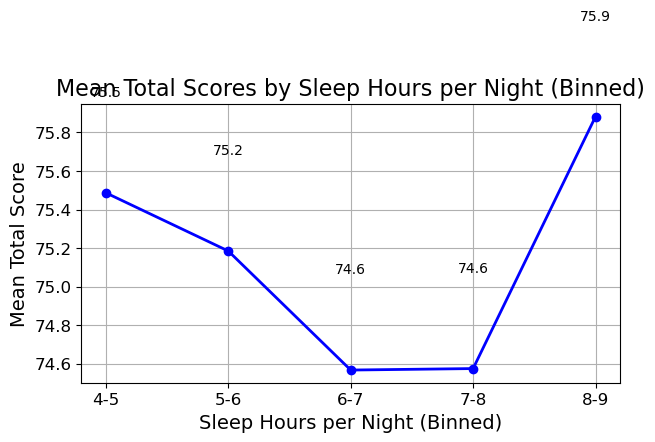

In [100]:

# Step 1: Define the bins and labels for Sleep_Hours_per_Night
bins = [4, 5, 6, 7, 8, 9]
labels = ['4-5', '5-6', '6-7', '7-8', '8-9']

# Step 2: Categorize Sleep_Hours_per_Night into bins
df['Sleep_Bins'] = pd.cut(df['Sleep_Hours_per_Night'], bins=bins, labels=labels, right=False)

# Step 3: Group by 'Sleep_Bins' and calculate the mean Total_Score
mean_scores_by_sleep_bins = df.groupby('Sleep_Bins')['Total_Score'].mean().sort_index()

# Step 4: Create a line chart
plt.plot(
    mean_scores_by_sleep_bins.index, 
    mean_scores_by_sleep_bins.values, 
    marker='o', 
    color='blue', 
    linestyle='-', 
    linewidth=2
)

# Step 5: Add labels and title
plt.title('Mean Total Scores by Sleep Hours per Night (Binned)', fontsize=16)
plt.xlabel('Sleep Hours per Night (Binned)', fontsize=14)
plt.ylabel('Mean Total Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Add gridlines for better readability

# Step 6: Annotate the points with their mean values
for i, value in enumerate(mean_scores_by_sleep_bins):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', fontsize=10, color='black')


plt.show()

### the numbers on the graph tell there is a little increase in grades with students who sleep little and much hours 

# Identify correlations and patterns in student performance.

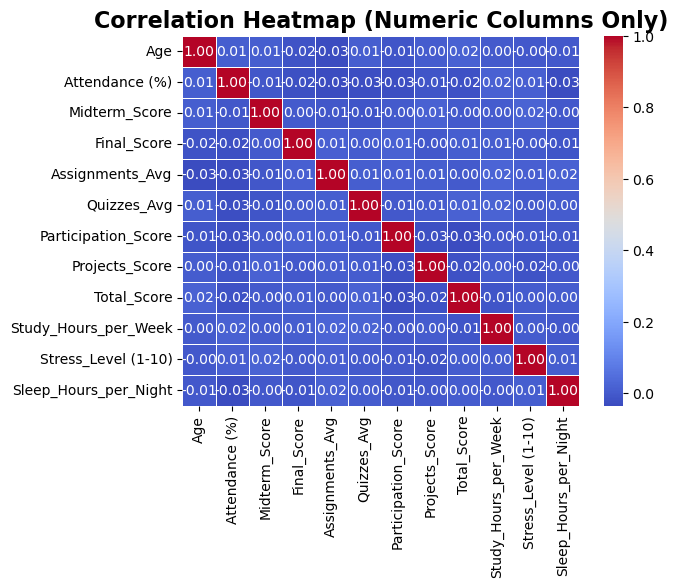

In [101]:
df_numeric = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Step 3: Create the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,           
    cmap='coolwarm',      
    fmt='.2f',            
    linewidths=0.5,       
    cbar=True             
)

plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=16, fontweight='bold')

plt.show()

## there is no correlation between any featuer and the total score

## from the previous analysis, the data does not support giving enough information but here some from what we got

### Midterm Exam:
The midterm exam was of moderate difficulty. Some students failed, some passed with low grades, and others achieved average scores with decent percentages. Therefore, the exam was moderately difficult, leaning towards being challenging. It is recommended to reduce its difficulty and investigate the reasons why some students did not pass this exam.

### Final Exam:
The final exam was difficult because many students did not pass it, and a significant number also did not achieve good grades.

### Assignments:
All students passed the assignments, which either indicates that they were easy or that cheating occurred since they were unsupervised as they were completed at home.

### Quizzes:
All students passed the quizzes, and a large percentage scored above 70%, indicating that they were easy.

### Participation in Lectures:
Participation in lectures was very low. We need to investigate this issue to uncover the reason. It could be due to boring lectures, students not being fully focused during the sessions, or any other factor.

### Overall:
The students' grades follow a uniform distribution.